# Example Full Coverage

This example shows to algorithms for full coverage.
For the more interesting partial coverage, look into the experiment notebooks.

In [1]:
from pcpptc import PolygonInstance, SimpleHexagonAlgorithm, MeshAlgorithm
from pcpptc.plot.polgyon_instance import plot_solution, plot_polygon_instance

import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LinearRing

from pcpptc.plot import setup_plot

In [2]:
# Creating an instance
poly = Polygon(
    shell=[
        Point(2.0, 2.0),
        Point(40.0, 3.0),
        Point(43.0, 30.0),
        Point(25.0, 31.0),
        Point(26.0, 35.0),
        Point(1.0, 34.0),
    ],
    holes=[
        LinearRing(
            [
                Point(15.0, 10.0),
                Point(17.0, 10.0),
                Point(18.0, 12.0),
                Point(15.0, 12.0),
            ][::-1]
        )
    ],
)
tool_radius = 1.0
instance = PolygonInstance(
    original_area=poly,
    feasible_area=poly.buffer(-tool_radius, cap_style=2, join_style=2),
    valuable_areas=[(poly, 1.0)],
    tool_radius=tool_radius,
    turn_cost=5.0,
)

<Figure size 640x480 with 0 Axes>

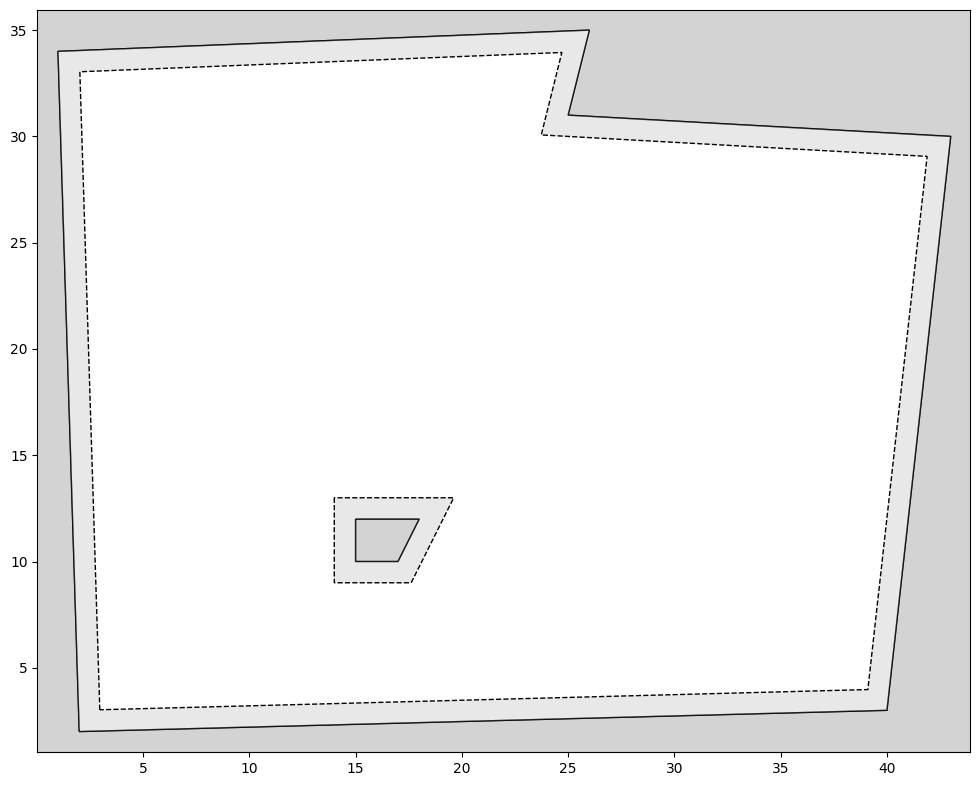

In [3]:
ax = setup_plot()
plot_polygon_instance(ax, instance, plot_valuable_areas=False)
plt.show()

## Hexagonal Grid

For simple instances, a simple hexagonal grid is often a good choice.

Converting polygon instance to grid instance...
Grid Solver:
Cycle Cover Solver:
Using linear programming and blossom matching to compute a cycle cover with turn-aware, heterogeneous touring costs.
IntegralizingFractionalSolverComputing a fractional solution with some BnB steps to improve integrality.Up to 50 BnB steps are performed.
NeighborBasedStripStrategy selecting 6 atomic strips first on usage than on minimizing the worst case overhead.
------------------------------
Local Relaxation CC Optimization:
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plus opportunity loss.
         
- Repeating 25 times.
------------------------------
Local Relaxation Tour Optimization:
- Like CC version but trying to reconnect unconnected solutions up to 10 times.
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plu

<Figure size 640x480 with 0 Axes>

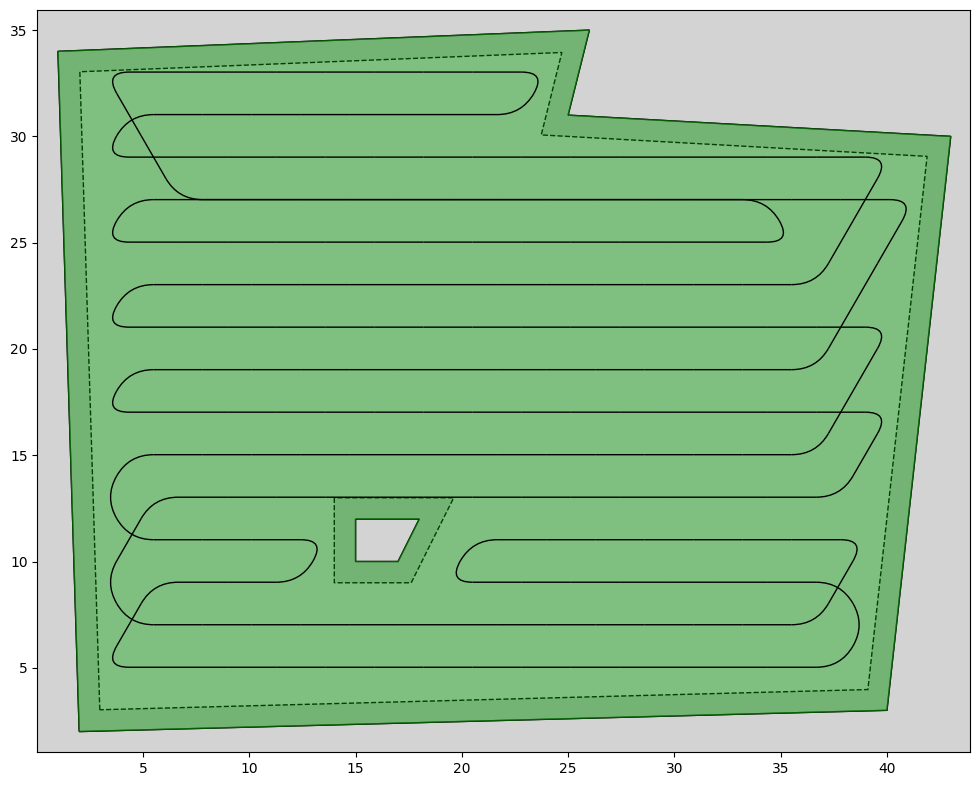

In [4]:
solver = SimpleHexagonAlgorithm(full_coverage=True)
solution = solver(instance)
ax = setup_plot()
plot_polygon_instance(ax, instance)
plot_solution(ax, solution)
plt.show()

In [5]:
print("Value of covered area:", instance.compute_covering_value(solution))
print("Value of missed area:", instance.compute_missed_covering_value(solution))
print("Touring cost of trajectory:", instance.compute_touring_cost(solution))

Value of covered area: 1042.3836584380767
Value of missed area: 168.61634156192326
Touring cost of trajectory: 857.7842069359464


## Mesh Algorithm

For more complex instances, we should use a mesh.

Converting polygon instance to grid instance...
dmsh not installed. Falling back to gmsh.
Falling back to gmsh.
using gmesh with Packing of Parallelograms
Good options are 1, 4, and 9.
Optimize grid with CVT-full
optimesh not installed. Falling back to unoptimized grid.
The solution quality can be much worse because of the missing smoothing.
Grid Solver:
Cycle Cover Solver:
Using linear programming and blossom matching to compute a cycle cover with turn-aware, heterogeneous touring costs.
IntegralizingFractionalSolverComputing a fractional solution with some BnB steps to improve integrality.Up to 50 BnB steps are performed.
NeighborBasedStripStrategy selecting 6 atomic strips first on usage than on minimizing the worst case overhead.
------------------------------
Local Relaxation CC Optimization:
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plus opportunity loss.
         
- Repeating 25 ti

<Figure size 640x480 with 0 Axes>

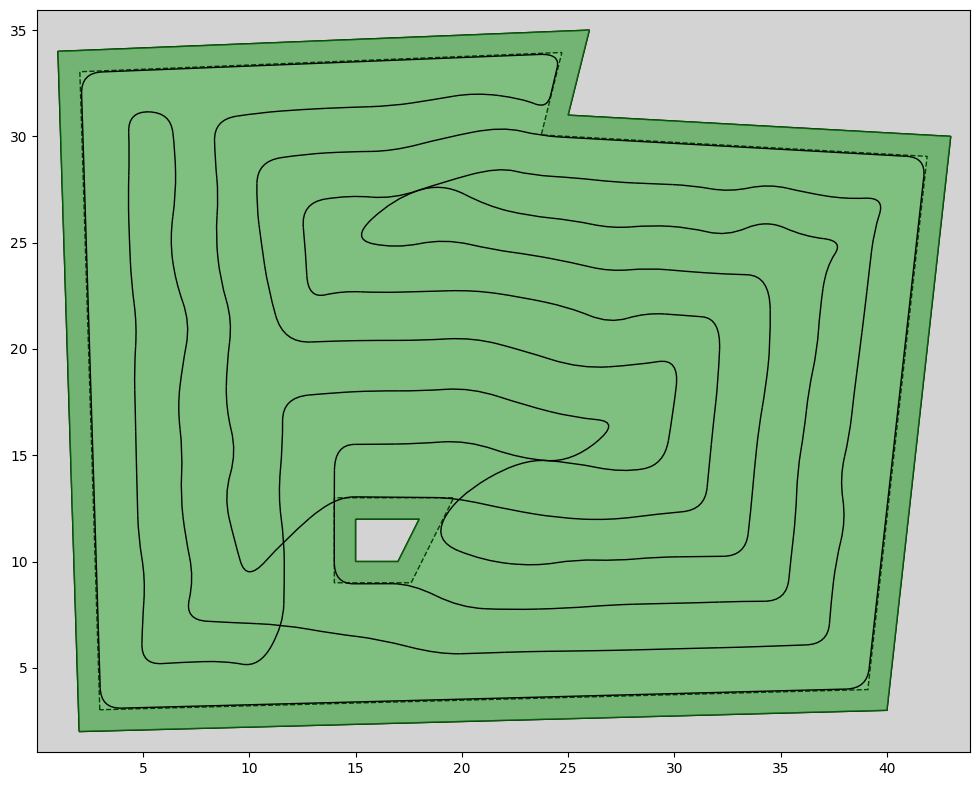

Value of covered area: 1114.3889426330056
Value of missed area: 96.61105736699437
Touring cost of trajectory: 1013.2459109315985


In [6]:
solver = MeshAlgorithm(full_coverage=True)
solution = solver(instance)
ax = setup_plot()
plot_polygon_instance(ax, instance)
plot_solution(ax, solution)
plt.show()
print("Value of covered area:", instance.compute_covering_value(solution))
print("Value of missed area:", instance.compute_missed_covering_value(solution))
print("Touring cost of trajectory:", instance.compute_touring_cost(solution))